# TP 2 Brownian motion

In [125]:
import numpy as np 
import matplotlib.pyplot as plt 

In [126]:
sample_size = 1000 
mean = 0 
std = 1 
T = 1
n = 12 #for time discretization 
delta_T = 2 ** (- n) * T #time step

# Forward Simulation

####  Question 1: forward simulation of  $ \{ \mathcal{W}_{t_1^n},\mathcal{W}_{t_1^n},...,\mathcal{W}_{t_n^n} \} $  

Since $\mathcal{W}$ is Brownian motion we know that :

\begin{eqnarray*}
\mathcal{W}_{t_i^n} - \mathcal{W}_{t^n_{i-1}} , i \in \{1,2,...,2^n\}
\end{eqnarray*}

is a family of independant $\mathcal{N}(0,\,\Delta T)$ random variable.

Let $\mathcal{Z}_i$ be such  that : 
\begin{equation}
\mathcal{Z}_i = \frac{1}{\Delta T}(\mathcal{W}_{t_i^n} - \mathcal{W}_{t^n_{i-1}} )
\end{equation}


$(\mathcal{Z}_i)_{1\le i\le 2^n}$ are i.i.d $\mathcal{N}(0,\,1)$ random variables and we have :

\begin{equation}
\mathcal{W}_{t_i^n} = \mathcal{W}_{t^n_{i-1}}  + \Delta T\mathcal{Z}_i \; , \; \; \forall \:  i  \: in \; [\![1, 2^n]\!]
\end{equation}


In [127]:
#forward simulation of the brownian motion  

def forward_simulation(n=n, T=T, sample_size=sample_size):
    delta_T = (1 / (2 ** n)) * T
    Z = np.random.normal(mean, std, size=(sample_size, 2 ** n + 1))
    W = np.zeros((sample_size, 2 ** n + 1))
    for i in range(sample_size): 
        W[i, 0] = Z[i, 0] * np.sqrt(delta_T)
        for j in range(1, 2 ** n + 1):
            W[i, j] = W[i, j-1] + np.sqrt(delta_T) * Z[i, j] 
    return W


In [128]:
W = forward_simulation(n)

Mean_WT = np.mean(W[:,-1])
Var_WT = np.var(W[:,-1])

In [34]:
def Cov_fsim(n): 
    W = forward_simulation(n)
    Covariance = np.cov(W[:,2 ** (n - 1)], W[:,-1])
    return Covariance[0, 1]
    
print("Sample size = %d" %(sample_size))       
print("Mean of W_T = %1.3f " %(Mean_WT))
print("Variance of W_T = %1.3f" %(Var_WT))
print("Covariance of W_T and W_T/2 = %1.3f" %(Cov_fsim(n)))

Sample size = 1000
Mean of W_T = -0.057 
Variance of W_T = 1.044
Covariance of W_T and W_T/2 = 0.534


In [41]:
Ns = np.arange(2, 16, dtype = int)
y = [ Cov_sim(n) for n in Ns]

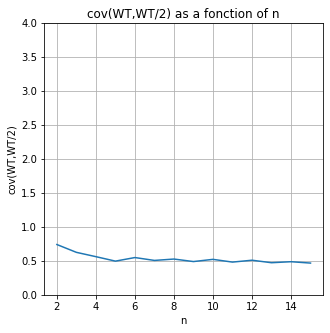

In [46]:
#plot of cov(WT,WT/2) as a fonction of n using forward simulation
plt.figure(figsize=(5,5))
plt.plot(Ns, y)
plt.xlabel("n")
plt.ylabel("cov(WT,WT/2)")
plt.title('cov(WT,WT/2) as a fonction of n using forward simulation')
plt.ylim(ymin=0,ymax=4)
plt.grid()
plt.show()

#### Theoretical Mean, Variance and Covariance 



## The plot of a strandard brownian motion ( forward simulation ) 

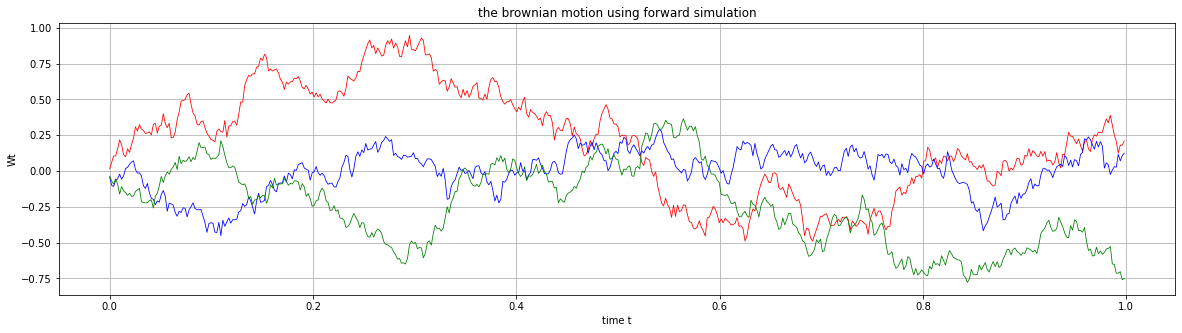

In [180]:
#three trajectories of a B.M
n0 = 9

W = forward_simulation(n0)

X = np.arange(0, 1, 1 / 2 ** n0)

#three exemples from the 1000 simulations
Y1 = [ W[:,i][250] for i in range(2 ** n0)]
Y2 = [ W[:,i][500] for i in range(2 ** n0)]  
Y3 = [ W[:,i][750] for i in range(2 ** n0)]  

#ploting
plt.figure(figsize=(20,5))
plt.plot(X, Y1, 'r-', linewidth=0.8)
plt.plot(X, Y2, 'b-', linewidth=0.8)
plt.plot(X, Y3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("Wt")
plt.title('the brownian motion using forward simulation')
plt.grid()
plt.show()

# Backward simulation

In [188]:
#backward simulation of the brownian motion  

def backward_simulation(n, T=1, sample_size=1000): 
    W = np.zeros((sample_size, 2 ** n + 1))
    temp_list=[0, 2 ** n]
    W[:, -1] = np.random.normal(0, T, size=sample_size)
    while len(temp_list) < 2 ** n + 1 : 
        elem_insert = [] #elements that we will insert in temp_list after the loop
        
        for j in range(len(temp_list) - 1): 
            delta_T = (1 / (2 ** n)) * T
            k = round((temp_list[j] + temp_list[j + 1]) / 2)
            mean = (W[:, temp_list[j]] + W[:, temp_list[j+1]]) / 2
            std = np.sqrt((temp_list[j+1] - temp_list[j]) * delta_T / 4)
            W[:, k] =  np.random.normal(mean, std, size=sample_size)  
            elem_insert += [k]
            
        for j in range(len(elem_insert)):
            temp_list.insert(2 * j + 1, elem_insert[j])  
    return W


In [185]:
W = backward_simulation(n)

Mean_WT = np.mean(W[:,-1])
Var_WT = np.var(W[:,-1])

In [186]:
def Cov_bsim(n): 
    W = backward_simulation(n)
    Covariance = np.cov(W[:,2 ** (n - 1)], W[:,-1])
    return Covariance[0, 1]
    
print("Sample size = %d" %(sample_size))       
print("Mean of W_T = %1.3f " %(Mean_WT))
print("Variance of W_T = %1.3f" %(Var_WT))
print("Covariance of W_T and W_T/2 = %1.3f" %(Cov_bsim(n)))

Sample size = 1000
Mean of W_T = -0.001 
Variance of W_T = 1.000
Covariance of W_T and W_T/2 = 0.478


In [170]:
Ns = np.arange(2, 16, dtype = int)
y = [ Cov_bsim(n) for n in Ns]

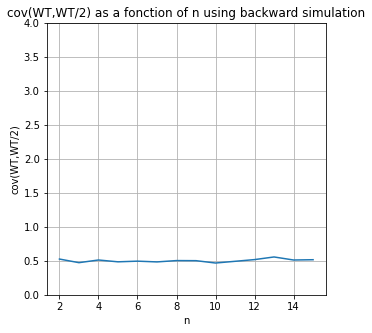

In [171]:
#plot of cov(WT,WT/2) as a fonction of n using backward simulation
plt.figure(figsize=(5,5))
plt.plot(Ns, y)
plt.xlabel("n")
plt.ylabel("cov(WT,WT/2)")
plt.title('cov(WT,WT/2) as a fonction of n using backward simulation')
plt.ylim(ymin=0,ymax=4)
plt.grid()
plt.show()

## The plot of a strandard brownian motion ( backward simulation ) 

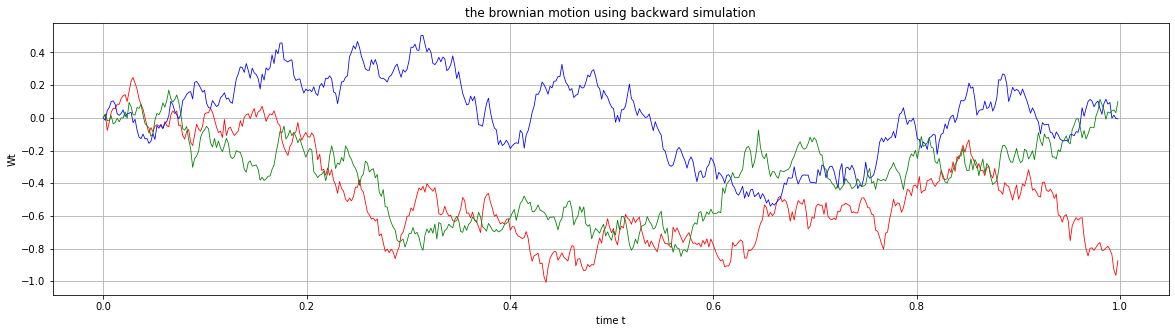

In [189]:
#three trajectories of a B.M
n0 = 9

W = backward_simulation(n0)

X = np.arange(0, 1, 1 / 2 ** n0)

#three exemples from the 1000 simulations
Y1 = [ W[:,i][250] for i in range(2 ** n0)]
Y2 = [ W[:,i][500] for i in range(2 ** n0)]  
Y3 = [ W[:,i][750] for i in range(2 ** n0)]  

#ploting
plt.figure(figsize=(20,5))
plt.plot(X, Y1, 'r-', linewidth=0.8)
plt.plot(X, Y2, 'b-', linewidth=0.8)
plt.plot(X, Y3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("Wt")
plt.title('the brownian motion using backward simulation')
plt.grid()
plt.show()

# Quadratic Variation

In [224]:
#Quadratic variation of a forward simulation of the standard B.M 

def QV_forward(n): 
    W = forward_simulation(n)
    QV = 0
    for i in range(2 ** n): 
        QV += abs(W[500][i+1] - W[500][i]) ** 2
    return QV


In [225]:
#Quadratic variation of a backward simulation of the standard B.M 

def QV_backward(n): 
    W = backward_simulation(n)
    QV = 0
    for i in range(2 ** n): 
        QV += abs(W[500][i+1] - W[500][i]) ** 2
    return QV


In [ ]:
Ns = np.arange(10, 21, dtype = int)
y_forward = [ QV_forward(n) for n in Ns]
y_backward = [ QV_backward(n) for n in Ns]

In [ ]:
#ploting the departure from the limit T for both forward and backward simulation
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
plt.plot(Ns, abs(np.array(y_forward) - T))
plt.xlabel("n")
plt.ylabel("diff of the forward QV and T")
plt.title('departure from the limit T for both forward and backward simulation')
plt.grid()
plt.ylim(ymin=0,ymax=0.05)

plt.subplot(2,1,2)
plt.plot(Ns, abs(np.array(y_backward) - T))
plt.xlabel("n")
plt.ylabel("diff of the backward QV and T")
plt.grid()
plt.ylim(ymin=0,ymax=0.05)

plt.tight_layout()
plt.show()

We can see that the QV of the backward simulation of the S.B.M converges to T faster than the QV of the forward simulation of the S.B.M  as n goes to infinity 